<a href="https://colab.research.google.com/github/ntakirutimanapierre/FINIA/blob/main/Fintech%20Index%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Introduction**
***1.1. Getting all AFrican Countries**

In [50]:
!pip install wbdata --quiet

# All the countries is Africa

world_bank_country_ids = {
    'DZA': 'Algeria',
    'AGO': 'Angola',
    'BEN': 'Benin',
    'BWA': 'Botswana',
    'BFA': 'Burkina Faso',
    'BDI': 'Burundi',
    'CPV': 'Cabo Verde',
    'CMR': 'Cameroon',
    'CAF': 'Central African Republic',
    'TCD': 'Chad',
    'COM': 'Comoros',
    'COG': 'Congo, Rep.',
    'COD': 'Congo, Dem. Rep.',
    'DJI': 'Djibouti',
    'EGY': ' Egypt',
    'GNQ': 'Equatorial Guinea',
    'ERI': 'Eritrea',
    'SWZ': 'Eswatini (Swaziland)',
    'ETH': 'Ethiopia',
    'GAB': 'Gabon',
    'GMB': 'Gambia, The',
    'GHA': 'Ghana',
    'GIN': 'Guinea',
    'GNB': 'Guinea-Bissau',
    'CIV': "Cote d'Ivoire",
    'KEN': 'Kenya',
    'LSO': 'Lesotho',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'MDG': 'Madagascar',
    'MWI': 'Malawi',
    'MLI': 'Mali',
    'MRT': 'Mauritania',
    'MUS': 'Mauritius',
    'MAR': 'Morocco',
    'MOZ': 'Mozambique',
    'NAM': 'Namibia',
    'NER': 'Niger',
    'NGA': 'Nigeria',
    'RWA': 'Rwanda',
    'STP': 'São Tomé and Príncipe',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'SLE': 'Sierra Leone',
    'SOM': 'Somalia',
    'ZAF': 'South Africa',
    'SSD': 'South Sudan',
    'SDN': 'Sudan',
    'TZA': 'Tanzania',
    'TGO': 'Togo',
    'TUN': 'Tunisia',
    'UGA': 'Uganda',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}
['Nigeria', 'South Africa', 'Ethiopia', 'Togo', 'Kenya', 'Tunisia',
       'Senegal', 'Zambia', 'Ghana', 'Morocco', 'Tanzania', 'Egypt',
       "CÃ´te d'Ivoire", 'Zimbabwe', 'Mauritius', 'Uganda', 'Algeria',
       'Malawi', 'Botswana', 'Democratic Republic of', 'Rwanda',
       'Seychelles', 'Cameroon', 'Mauritania', 'Mali', 'Burkina Faso',
       'Sierra Leone', 'Gambia', 'Lesotho', 'Gabon', 'Namibia', 'Burundi',
       'Angola', 'Chad', 'Madagascar', 'Djibouti', 'Congo', 'Liberia',
       'Guinea', 'Somalia', 'Benin', 'Mozambique']


world_bank_country_ids = {
    'DZA': 'Algeria',
    'AGO': 'Angola',
    'BEN': 'Benin',
    'BWA': 'Botswana',
    'BFA': 'Burkina Faso',
    'BDI': 'Burundi',
    'CPV': 'Cabo Verde',  # Not in the list, kept as is
    'CMR': 'Cameroon',
    'CAF': 'Central African Republic',  # Not in the list, kept as is
    'TCD': 'Chad',
    'COM': 'Comoros',  # Not in the list, kept as is
    'COG': 'Congo, Rep.',
    'COD':  'Democratic Republic of',
    'COD': 'Congo',
    'DJI': 'Djibouti',
    'EGY': 'Egypt',
    'GNQ': 'Equatorial Guinea',  # Not in the list, kept as is
    'ERI': 'Eritrea',  # Not in the list, kept as is
    'SWZ': 'Eswatini (Swaziland)',  # Not in the list, kept as is
    'ETH': 'Ethiopia',
    'GAB': 'Gabon',
    'GMB': 'Gambia, The',
    'GHA': 'Ghana',
    'GIN': 'Guinea',
    'GNB': 'Guinea-Bissau',  # Not in the list, kept as is
    'CIV': "Cote d'Ivoire",
    'KEN': 'Kenya',
    'LSO': 'Lesotho',
    'LBR': 'Liberia',
    'LBY': 'Libya',  # Not in the list, kept as is
    'MDG': 'Madagascar',
    'MWI': 'Malawi',
    'MLI': 'Mali',
    'MRT': 'Mauritania',
    'MUS': 'Mauritius',
    'MAR': 'Morocco',
    'MOZ': 'Mozambique',
    'NAM': 'Namibia',
    'NER': 'Niger',  # Not in the list, kept as is
    'NGA': 'Nigeria',
    'RWA': 'Rwanda',
    'STP': 'São Tomé and Príncipe',  # Not in the list, kept as is
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'SLE': 'Sierra Leone',
    'SOM': 'Somalia',
    'ZAF': 'South Africa',
    'SSD': 'South Sudan',  # Not in the list, kept as is
    'SDN': 'Sudan',  # Not in the list, kept as is
    'TZA': 'Tanzania',
    'TGO': 'Togo',
    'TUN': 'Tunisia',
    'UGA': 'Uganda',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}




# **IMPORT PACHAGES AND AUTHENTICATE GOOGLE DRIVE**

In [51]:
import requests
import json

from google.colab import drive # this one is used to use google drive into colab
from google.colab import auth  # Authenticate the drive to colab notebook.
import gspread
from google.auth import default
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


drive.mount('/content/drive')
auth.authenticate_user()

creds, _ = default()
gc = gspread.authorize(creds)

import wbdata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Get the GSMA index data from their website and filter SSA**

In [52]:
gsma_index = pd.read_excel('https://www.mobileconnectivityindex.com/assets/excelData/MCI_Data_2024.xlsx', sheet_name='Index Scores',skiprows=2)
sub_saharan_africa = gsma_index[gsma_index['ISO Code'].isin(world_bank_country_ids.keys()) ]

sub_saharan_africa.columns

Index(['ISO Code', 'Country', 'Region', 'Year', 'Cluster', 'Index',
       'Infrastructure', 'Affordability', 'Consumer Readiness',
       'Content and Services', 'Network coverage', 'Network performance',
       'Spectrum', 'Mobile data affordability', 'Handset affordability',
       'Taxation', 'Mobile Ownership', 'Basic Skills', 'Gender Equality',
       'Local Relevance', 'Online Security', '2G Population Coverage',
       '3G Population Coverage', '4G Population Coverage',
       '5G Population Coverage', 'Mobile download speeds',
       'Mobile upload speeds', 'Mobile latencies',
       'Spectrum assigned in bands below 1GHz',
       'Spectrum assigned in bands between 1-3GHz',
       'Spectrum assigned in bands between 3-6GHz',
       'Spectrum assigned in mmWave bands',
       'Affordability of entry basket (1GB)',
       'Affordability of higher basket (5GB)',
       'Affordability of entry basket (1GB) for poorest 40%',
       'Affordability of higher basket (5GB) for poorest

In [53]:
# sub_saharan_afric

gsma_index = pd.pivot_table(sub_saharan_africa,
                             values='Index',
                             index='Year',
                             columns='Country',
                            #  aggfunc='mean',
                          fill_value=np.nan)
Literacy_rate = pd.pivot_table(sub_saharan_africa,
                             values='Literacy',
                             index='Year',
                             columns='Country',
                            #  aggfunc='mean',
                          fill_value=np.nan)



In [54]:

print(Literacy_rate.columns)
print(gsma_index.columns)

Literacy_rate.columns == gsma_index.columns


Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Congo, Democratic Republic', 'Cote d'Ivoire', 'Egypt',
       'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
       'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country')
Index(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo', 'Congo, Democratic Republic', 'Cote d'Ivoire', 'Egypt',
       'Equatorial Guinea', 'Eswatini', 'Et

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

# **VISUALIZE THE LITERACY RATE FOR FEW DIFFERENT YEARS**

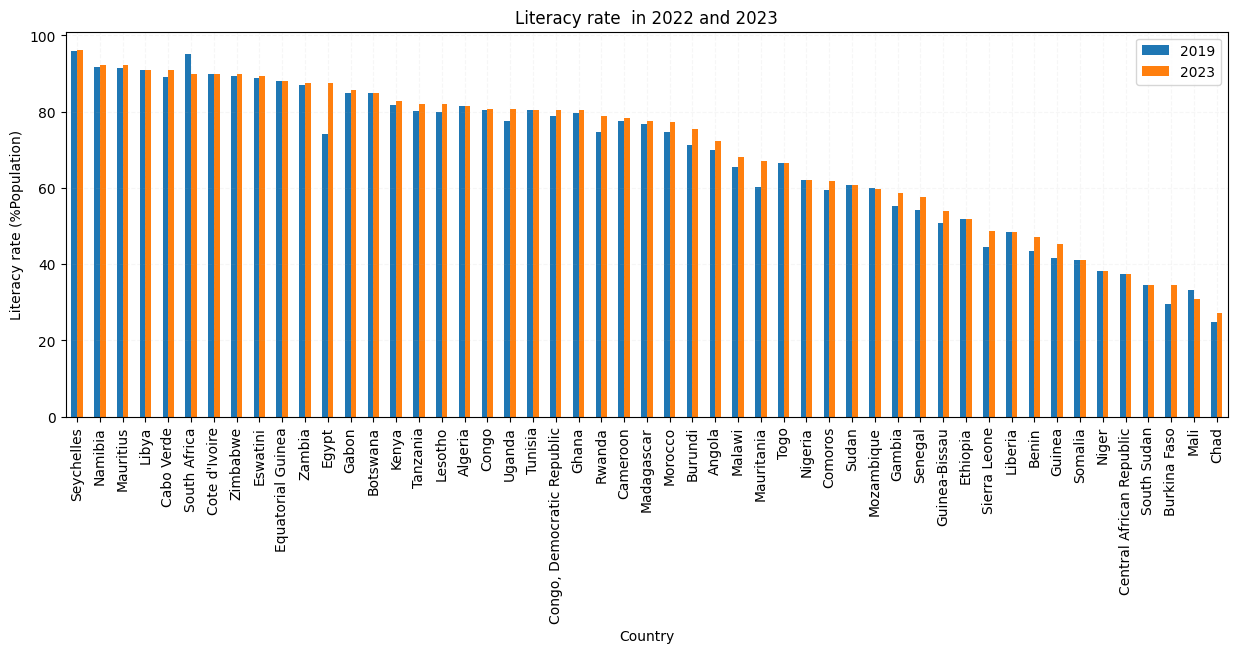

In [55]:
Literacy_rate[(Literacy_rate.index).isin([2019, 2023])].T.sort_values(by=[2023], ascending=False).plot(kind = 'bar', figsize=(15, 5),legend = False,)
plt.legend(loc='best')
plt.grid(True, linestyle = '--', alpha = 0.1)
plt.ylabel('Literacy rate (%Population)')
plt.title('Literacy rate  in 2022 and 2023')
plt.show()

# **VISUALIZE THE TIMESERIES OF GSMA INDEX SCORE FROM 2014 TO 2023**

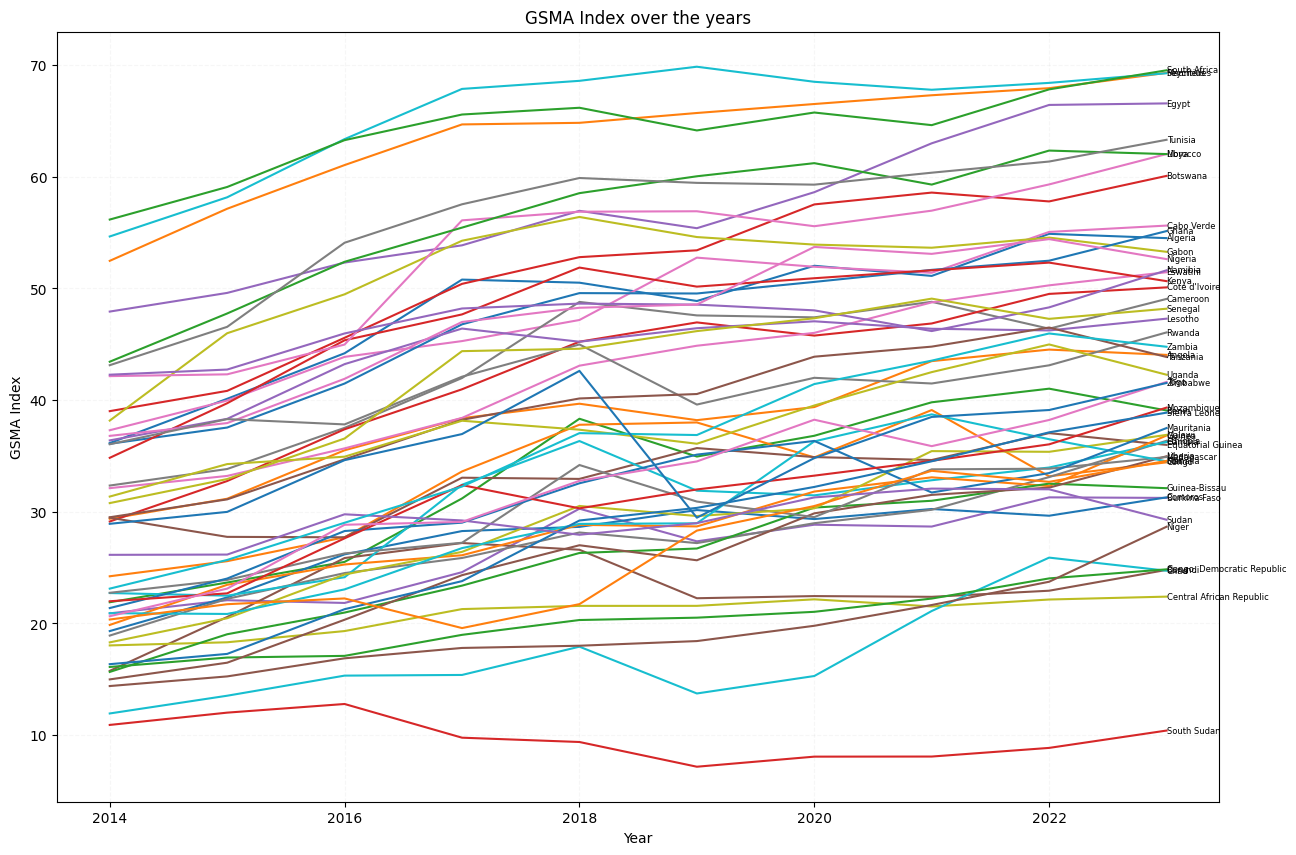

In [56]:
bax = gsma_index.plot(figsize=(15, 10),legend = False)
# plt.legend(loc='best')
for country in gsma_index.columns:
    bax.text(2023, gsma_index[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=6, color ='black',zorder=30)

plt.grid(True, linestyle = '--', alpha = 0.1)
plt.ylabel('GSMA Index')
plt.title('GSMA Index over the years')
plt.ylabel('GSMA Index')
plt.show()



<Axes: title={'center': 'Mean GSMA Index Score per Country (2014-2023)'}, xlabel='Index', ylabel='Country'>

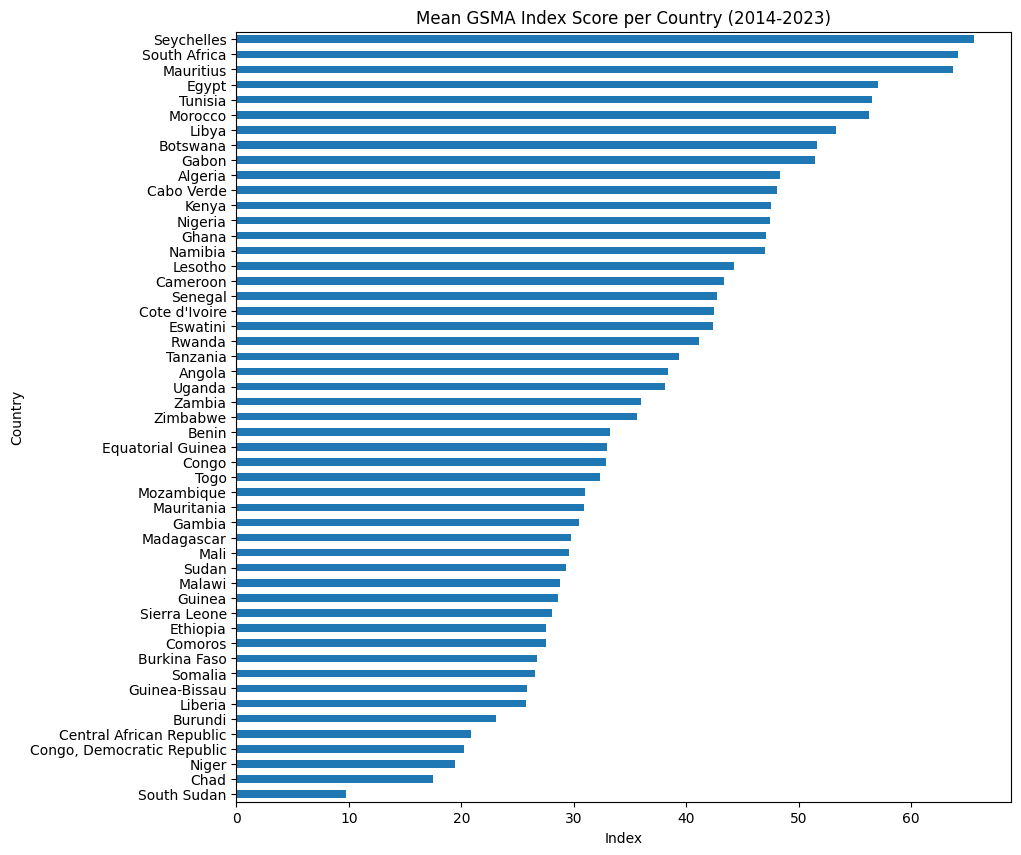

In [57]:
gsma_index.mean(axis=0).sort_values(ascending = True).plot(kind='barh', figsize = (10, 10), xlabel='Index', ylabel='Country', title = 'Mean GSMA Index Score per Country (2014-2023)')

## **Get the number of countries represented in the GSMA index**

In [58]:
# Get the iso codes for all Sub-Saharan Africa countries which are available in GSMA indicator
worl_countries = pd.DataFrame(wbdata.get_countries())[['id','name']]
africa_countries = worl_countries[worl_countries['id'].isin(sub_saharan_africa['ISO Code'])]
africa_countries.reset_index(drop=True,inplace=True)

print(f"The dataset has only {africa_countries.shape[0]} countries in Africa")
print(africa_countries['name'].unique())



The dataset has only 51 countries in Africa
['Angola' 'Burundi' 'Benin' 'Burkina Faso' 'Botswana'
 'Central African Republic' "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Comoros' 'Cabo Verde' 'Algeria' 'Egypt, Arab Rep.'
 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Gambia, The' 'Guinea-Bissau'
 'Equatorial Guinea' 'Kenya' 'Liberia' 'Libya' 'Lesotho' 'Morocco'
 'Madagascar' 'Mali' 'Mozambique' 'Mauritania' 'Mauritius' 'Malawi'
 'Namibia' 'Niger' 'Nigeria' 'Rwanda' 'Sudan' 'Senegal' 'Sierra Leone'
 'Somalia' 'South Sudan' 'Eswatini' 'Seychelles' 'Chad' 'Togo' 'Tunisia'
 'Tanzania' 'Uganda' 'South Africa' 'Zambia' 'Zimbabwe']


# **Get Population Data To help In normalization**

In [59]:
african_population = wbdata.get_dataframe(indicators  = {'SP.POP.TOTL': 'Population', 'NY.GDP.MKTP.CD':'GDP (curent$)','SE.ADT.LITR.ZS':'Literacy rate'},
                                          country = world_bank_country_ids.keys(), date = ('2009','2024'), keep_levels=True).reset_index()


african_population_pvt =pd.pivot_table(african_population,
                             values='Population',
                             index='date',
                             columns='country',
                             aggfunc=sum,
                             fill_value=np.nan)
african_gdp_pvt =pd.pivot_table(african_population,
                             values='GDP (curent$)',
                             index='date',
                             columns='country',
                             aggfunc=sum,
                             fill_value=np.nan)




In [60]:
# Literacy
# african_gdp_pvt



# **1.O READ THE CRUNCHBASE DATA AND PREPROSES IT**.

In [61]:

# Open the Google Sheet by its ID
sheet_id = '18k8I7iBHt6FdWzogrAPQ-cmAR5wN1oHkwNS7ou6WTrk'
worksheet = gc.open_by_key(sheet_id).get_worksheet(0)

# Get all values from the sheet
rows = worksheet.get_all_values()
# Create a dataframe
df = pd.DataFrame(rows[1:], columns=rows[0])
# df = df.iloc[:295, :-6]
# Replace blank space with NaN
df = df.replace('', 0)


df['Announced Date'] = pd.to_datetime(df['Announced Date'])
df['Money Raised (in USD)'] = df['Money Raised (in USD)'].astype(float)
df['Number of Investors'] = df['Number of Investors'].astype(int)
df['Money Raised'] = df['Money Raised'].astype(float)
df['Number of Funding Rounds'] = df['Number of Funding Rounds'].astype(int)
df['Total Funding Amount'] = df['Total Funding Amount'].astype(float)
df['Total Funding Amount (in USD)'] = df['Total Funding Amount (in USD)'].astype(float)
df['Year'] = df['Announced Date'].dt.year

df['Country'] = df['Organization Location'].apply(lambda x: x.split(', ')[-2])

# change the country name to the country codes
# Get the first matching key

# change  = lambda x: world_bank_country_ids.keys()[world_bank_country_ids.values().index(x)] if x in world_bank_country_ids.values() else x




# df['Country'] = df['Country'].apply(change)

In [62]:
df['Country'].unique()

array(['Nigeria', 'South Africa', 'Ethiopia', 'Togo', 'Kenya', 'Tunisia',
       'Senegal', 'Zambia', 'Ghana', 'Morocco', 'Tanzania', 'Egypt',
       "CÃ´te d'Ivoire", 'Zimbabwe', 'Mauritius', 'Uganda', 'Algeria',
       'Malawi', 'Botswana', 'Democratic Republic of', 'Rwanda',
       'Seychelles', 'Cameroon', 'Mauritania', 'Mali', 'Burkina Faso',
       'Sierra Leone', 'Gambia', 'Lesotho', 'Gabon', 'Namibia', 'Burundi',
       'Angola', 'Chad', 'Madagascar', 'Djibouti', 'Congo', 'Liberia',
       'Guinea', 'Somalia', 'Benin', 'Mozambique'], dtype=object)

In [63]:
a = [Literacy_rate,
gsma_index,
african_gdp_pvt,
df]





In [64]:
df['Country'].unique()

array(['Nigeria', 'South Africa', 'Ethiopia', 'Togo', 'Kenya', 'Tunisia',
       'Senegal', 'Zambia', 'Ghana', 'Morocco', 'Tanzania', 'Egypt',
       "CÃ´te d'Ivoire", 'Zimbabwe', 'Mauritius', 'Uganda', 'Algeria',
       'Malawi', 'Botswana', 'Democratic Republic of', 'Rwanda',
       'Seychelles', 'Cameroon', 'Mauritania', 'Mali', 'Burkina Faso',
       'Sierra Leone', 'Gambia', 'Lesotho', 'Gabon', 'Namibia', 'Burundi',
       'Angola', 'Chad', 'Madagascar', 'Djibouti', 'Congo', 'Liberia',
       'Guinea', 'Somalia', 'Benin', 'Mozambique'], dtype=object)

#### **Check the number of columns we have on clunchabase data**

In [65]:
print(f"The dataset has {df.shape[1]} columns")
print(df.columns)

The dataset has 21 columns
Index(['Transaction Name', 'Transaction Name URL', 'Organization Industries',
       'Organization Location', 'Organization Name', 'Organization Name URL',
       'Funding Type', 'Money Raised', 'Money Raised Currency',
       'Money Raised (in USD)', 'Announced Date', 'Funding Stage',
       'Equity Only Funding', 'Number of Funding Rounds', 'Funding Status',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount (in USD)', 'Number of Investors', 'Year',
       'Country'],
      dtype='object')


In [66]:
# df['Organization Location'][1].split(',')[-2]


df['Country'].replace("Cabo Verde","Cape Verde",inplace=True)
# df['Country'].replace("Congo (Brazzaville)","Congo-Brazzaville",inplace=True)



unique_countries = df['Country'].unique()
print(f'Only {len(unique_countries)} countries were represeted in the dataset \n {unique_countries}')

Only 42 countries were represeted in the dataset 
 ['Nigeria' 'South Africa' 'Ethiopia' 'Togo' 'Kenya' 'Tunisia' 'Senegal'
 'Zambia' 'Ghana' 'Morocco' 'Tanzania' 'Egypt' "CÃ´te d'Ivoire" 'Zimbabwe'
 'Mauritius' 'Uganda' 'Algeria' 'Malawi' 'Botswana'
 'Democratic Republic of' 'Rwanda' 'Seychelles' 'Cameroon' 'Mauritania'
 'Mali' 'Burkina Faso' 'Sierra Leone' 'Gambia' 'Lesotho' 'Gabon' 'Namibia'
 'Burundi' 'Angola' 'Chad' 'Madagascar' 'Djibouti' 'Congo' 'Liberia'
 'Guinea' 'Somalia' 'Benin' 'Mozambique']


In [67]:
for country  in  unique_countries:
  if country not in african_population['country'].unique():
    print(country)

Egypt
CÃ´te d'Ivoire
Democratic Republic of
Gambia
Congo


In [68]:
pivot_table = pd.pivot_table(df,
                             values='Money Raised (in USD)',
                             index='Year',
                             columns='Country',
                             aggfunc='sum',
                          fill_value=np.nan)

print('This is how the data look like when it comes after pivoting')
# display(pivot_table.T)

This is how the data look like when it comes after pivoting


In [76]:
# pivot_table
def normalise(investment, normalizer):
  normalised_invesyment = pd.DataFrame()
  for country in investment.columns:
    normalised_invesyment[country] = investment[country].values / normalizer[country].values
  african_population_pvt

  normalised_invesyment.index = investment.index
  # normalised_invesyment

  return normalised_invesyment



def normalise(investment, normalizer):
  normalised_invesyment = pd.DataFrame()
  for country in investment.columns:
    # Get the common years for both DataFrames
    common_years = investment[country].dropna().index.intersection(normalizer[country].dropna().index)
    # Perform the division only for common years
    normalised_invesyment[country] = investment.loc[common_years, country].values / normalizer.loc[common_years, country].values

  normalised_invesyment.index = common_years
  return normalised_invesyment


# MONEY RAISED

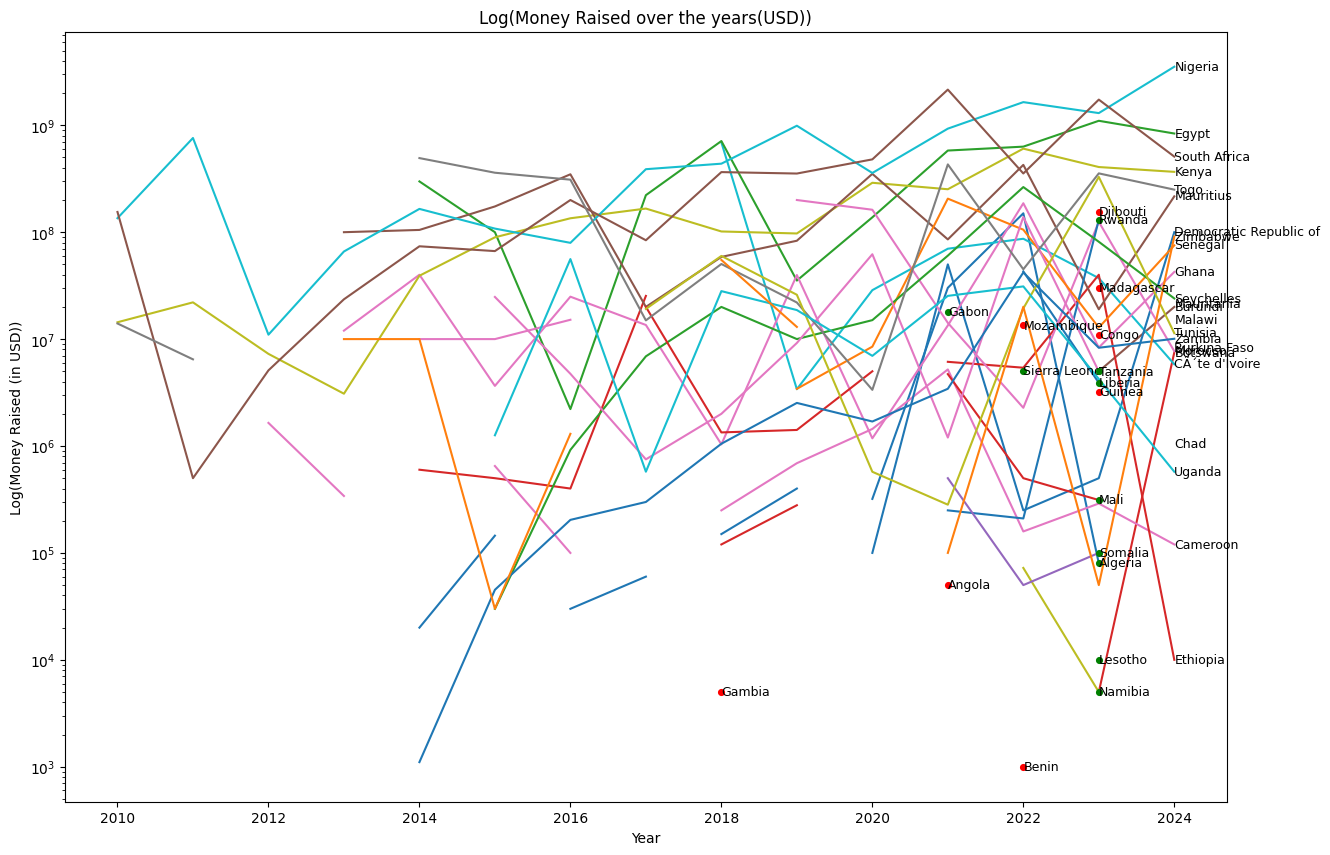

In [70]:
ax = pivot_table.plot(figsize=(15, 10),legend = False)

# for country in pivot_table.columns:
#     ax.text(pivot_table[country].dropna().index[-1], pivot_table[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=10, color ='black',zorder=30)

for country in pivot_table.columns:
  last_year_in_data = pivot_table[country].dropna().index[-1]
  last_amount = pivot_table[country].dropna().iloc[-1]

  if last_year_in_data != 2024:
    if len(pivot_table[country].dropna().index) == 1:
      plt.scatter(last_year_in_data, last_amount,marker='o', s=17, c='red', zorder=30, label = 'Appears Once')

    else:
      plt.scatter(last_year_in_data, last_amount,marker='o', s=17, c='green', zorder=30)

  ax.text(last_year_in_data,  last_amount, country, va='center', ha='left',fontsize=9, color ='black',zorder=30, label = 'Appears many times before 2024')


# plt.ylim(0,500)
ax.set_ylabel('Log(Money Raised (in USD))')
ax.set_title('Log(Money Raised over the years(USD))')
ax.set_yscale('log')
plt.show()



In [71]:
# pivot_table.mean(axis=0).sort_values(ascending = False)

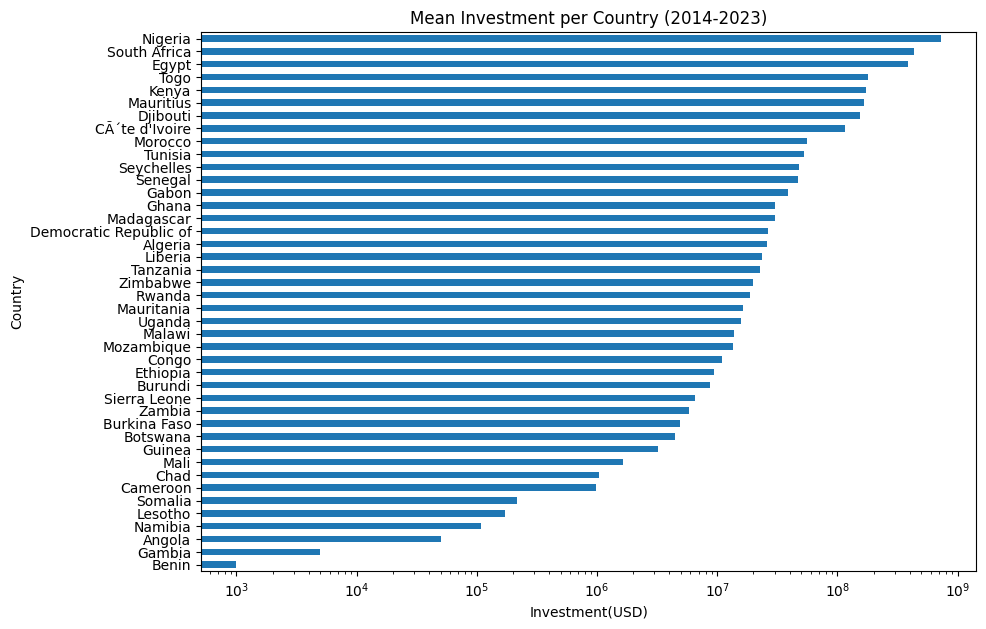

In [72]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=pivot_table.reset_index())

ax = pivot_table.mean(axis=0).sort_values(ascending = True).plot(kind='barh', figsize = (10, 7), xlabel='Investment(USD)', ylabel='Country', title = 'Mean Investment per Country (2014-2023)')
ax.set_xscale('log')
plt.show()


# we don't have: Mali, Somalia,

# **Normalize by the Total Population**

In [77]:
# normalised_invesyment
normalised_invesyment = normalise(pivot_table,african_population_pvt)


ax = normalised_invesyment.plot(figsize=(15, 5),legend = False)

for country in normalised_invesyment.columns:
    ax.text(normalised_invesyment[country].dropna().index[-1], normalised_invesyment[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=10, color ='black',zorder=30)


# plt.ylim(0,500)
ax.set_ylabel('Investment/Total Population')
ax.set_title(' Investment per capita over the years')

plt.show()

KeyError: 'Congo'

# **Normalise by Total National GDP**

In [74]:
# normalised_invesyment
normalised_invesyment_byGDP = normalise(pivot_table,african_gdp_pvt)*100



ax = normalised_invesyment_byGDP.plot(figsize=(15, 10),legend = False, label = '')

for country in normalised_invesyment_byGDP.columns:
  last_year_in_data = normalised_invesyment[country].dropna().index[-1]
  last_amount = normalised_invesyment_byGDP[country].dropna().iloc[-1]

  if last_year_in_data != 2024:
    if len(normalised_invesyment[country].dropna().index) == 1:
      plt.scatter(last_year_in_data, last_amount,marker='o', s=17, c='red', zorder=30, label = 'Appears Once')

    else:
      plt.scatter(last_year_in_data, last_amount,marker='o', s=17, c='green', zorder=30)

  ax.text(last_year_in_data,  last_amount, country, va='center', ha='left',fontsize=9, color ='black',zorder=30, label = 'Appears many times before 2024')



# plt.ylim(0,500)
# ax.set_yscale('log')
ax.set_yscale('log')
ax.set_ylabel('Log(Investment/Total National GDP)')
ax.set_title(' Normalised Investment  over the years')
# plt.legend()
plt.show()



ValueError: operands could not be broadcast together with shapes (15,) (16,) 

In [ ]:
# normalised_invesyment_byGDP.min().sort_values()

In [ ]:
normlize = lambda x: (np.log(x) - np.log(10e-7)) / ((np.log(20)- np.log(10e-7)))
minmax_normalize = lambda x: (x - 10e-6) / (20 - 10e-6)


# Renormalise
normalised_invesyment_byGD = normalised_invesyment_byGDP.apply(normlize)




ax = normalised_invesyment_byGD.plot(figsize=(15, 10),legend = False, label = '')

for country in normalised_invesyment_byGD.columns:
  last_year_in_data = normalised_invesyment_byGD[country].dropna().index[-1]
  last_amount = normalised_invesyment_byGD[country].dropna().iloc[-1]

  if last_year_in_data != 2024:
    if len(normalised_invesyment_byGD[country].dropna().index) == 1:
      plt.scatter(last_year_in_data, last_amount,marker='o', s=17, c='red', zorder=30, label = 'Appears Once')

    else:
      plt.scatter(last_year_in_data, last_amount,marker='o', s=17, c='green', zorder=30)

  ax.text(last_year_in_data,  last_amount, country, va='center', ha='left',fontsize=9, color ='black',zorder=30, label = 'Appears many times before 2024')



# plt.ylim(0,500)
# ax.set_yscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Log(Investment/Total National GDP)')
ax.set_title(' Re-Normalised Investment  over the years')
# plt.legend()
plt.show()

# **Which Variables do we have so far?**

In [ ]:


Investment =  normalised_invesyment_byGD.copy()         #normalised_invesyment_byGDP.interpolate(method='linear', axis=0,)
# normalised_invesyment = normalised_invesyment[normalised_invesyment.index.isin(range(2014, 2024))]
# gsma_index
# Literacy_rate
##

# Investment


In [ ]:
# normalised_invesyment_byGDP.info()

In [ ]:
class Index_calculation:
        def __init__(self,Investment =Investment, gsma_index = gsma_index ,Literacy_rate = Literacy_rate):
            self.Investment = Investment
            self.gsma_index = gsma_index/100
            self.Literacy_rate = Literacy_rate/100
            # display(self.Investment, self.gsma_index, self.Literacy_rate)
            # Get the current date and time
            from datetime import datetime
            current_datetime = datetime.now()

            # Access the year attribute
            self.current_year = current_datetime.year


        def calculate(self, year, sliding_window =1, plot = False, arthmetic = False):
          if sliding_window < 1:
            raise ValueError("The sliding window should be greater than 1")
          else:
            self.year = year
            self.start_year = year - sliding_window +1

            # make sure that the index start from 2014 and don't let it go beyond today
            if self.year < 2014:
              raise ValueError("The year should be greater than 2014")
            elif self.year > self.current_year:
              raise ValueError(f"The year should be less than {self.current_year} ")

            else:
              Investment = self.Investment[(self.Investment.index).isin(range(self.start_year, self.year+1))].mean(axis=0)
              gsma_index = self.gsma_index[(self.gsma_index.index).isin(range(self.start_year, self.year+1))].mean(axis=0)
              Literacy_rate = self.Literacy_rate[(self.Literacy_rate.index).isin(range(self.start_year, self.year+1))].mean(axis=0)

              if arthmetic:
                  index = (1/3)*Investment + (1/3)*gsma_index + (1/3)*Literacy_rate
              else:
                  index = (Investment*gsma_index *Literacy_rate)**(1/3)
              # display(Literacy_rate, gsma_index, Investment)

              index = np.round(index,2)
              self.combined_dataframe = pd.concat([Investment, gsma_index, Literacy_rate, index], axis=1)
              self.combined_dataframe.columns = ['Investment', 'gsma_index', 'Literacy_rate', f'Index Score: {self.year}']
              # index


              # index = index.reset_index()
              # index.columns = ['Country', f'Index Score: {self.year}']

              if plot:
                sort = index.sort_values(ascending=True,)
                ax = sort.dropna().plot(kind='barh', figsize = (15, 10), ylabel='Investment', xlabel='Country')
                ax.set_title(f'FINTECH Index Score in {self.year} with sliding window ={sliding_window}')
              index = index.reset_index()
              index.columns = ['Country', self.year]
              index = index.set_index('Country')
              return index, self.combined_dataframe

        def index_over_the_years(self,  begin = 2014, end = 2024, sliding_window =1, arthmetic = False):
            self.begin = begin
            self.end = end
            self.end = end
            years = list(range(self.begin, self.end+1))
            self.years = years

            Final_scores = pd.DataFrame()
            break_down = pd.DataFrame()
            for year in years:
              index, _ = self.calculate(year = year, sliding_window = sliding_window, arthmetic = arthmetic)
              Final_scores = pd.concat([Final_scores, index], axis=1)
            Final_scores.columns = years
            return Final_scores

        # plot Final_scores
        def plot(self, begin=2014, end = 2024,seliding_window = 1, bar = False, line = False):
            scores = self.index_over_the_years(begin, end, seliding_window)
            scores = scores.T.dropna(how = 'all', axis = 1)

            def lineplot(score):
              ax = scores.plot(kind = 'line', figsize=(15, 8),legend = False)
              for country in scores.columns:
                ax.text(end, scores[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=7,zorder=30)


              plt.grid(True, linestyle = '--', alpha = 0.1)
              plt.ylabel('FINTECH Index Score')
              plt.title(f'FINTECH Index Score from {begin} to {end} with sliding window of: {seliding_window} ')
              # plt.legend(False)
              # plt.ylim(18,)
              plt.show()

            def barplot(score):
              scores.plot(kind = 'barh', figsize=(15, 5), legend = False)
              plt.show()

            if bar:
              barplot(scores)
            if line:
              lineplot(scores)

            if not bar and not line:
              raise ValueError("You did not select a plotter")

        def plot_break_down(self, year, sliding_window =1, plot = False, arthmetic = False, display_table = False):
          _, break_down = self.calculate(year = year, sliding_window = sliding_window, plot = False, arthmetic = arthmetic)
          break_down = break_down.sort_values(by=f'Index Score: {year}', ascending=False)

          # Remove Index score column
          # break_down_ = break_down.drop(columns=[f'Index Score: {year}'])

          # display the figure
          if display_table:
            display(break_down)

          new_breadown = pd.DataFrame()
          for column in break_down.columns:
            if column != f'Index Score: {year}':

              others = break_down.drop(columns = [column,f'Index Score: {year}' ])
              new_breadown[column] = (break_down[f'Index Score: {year}']**3)/others.prod(axis=1)



          # plot stacked horizontal barhraph
          new_breadown.dropna(inplace = True)

          if plot:
            ax = new_breadown.plot(kind = 'barh',stacked = True, figsize=(15, 10),legend = True)





In [ ]:
# Index_calculation().plot(2014, 2024,1, False, True)
Index_calculation().plot_break_down(year = 2023, sliding_window = 1, plot = False, arthmetic = False, display_table = True)

In [ ]:
Index_calculation().plot_break_down(year = 2023, sliding_window = 1, plot = True, arthmetic = False, display_table = False)

In [ ]:
Index_calculation().plot(2014, 2024 ,1 , False, True)

In [ ]:
score_2024 = Index_calculation().calculate( 2023,1, True)

# display(score_2024.sort_values(by = 2023, ascending = False))


In [ ]:
score_2024 = Index_calculation().calculate( 2023,4, True)

# display(score_2024)

In [ ]:
score_2024 = Index_calculation().calculate( 2023,5, False)
# score_2024
# display(score_2024.sort_values(by = 2023, ascending = False))

In [ ]:
score_2024